In [1]:
import os
import numpy as np

import spacy 
from spacy import displacy

import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel, LsiModel, HdpModel


import matplotlib.pyplot as plt
import sklearn
import keras

import warnings

warnings.filterwarnings('ignore', category=DeprecationWarning)
print(spacy.__version__)

ModuleNotFoundError: No module named 'tensorflow'

In [17]:
import os

test_data_dir = '{}'.format(os.sep).join([gensim.__path__[0], 'test', 'test_data'])
file_list = os.listdir(test_data_dir)

print("Fichiers disponibles dans le répertoire test_data de Gensim :")
for file in file_list:
    print(file)


Fichiers disponibles dans le répertoire test_data de Gensim :
alldata-id-10.txt
atmodel_3_0_1_model
atmodel_3_0_1_model.expElogbeta.npy
atmodel_3_0_1_model.id2word
atmodel_3_0_1_model.state
bgwiki-latest-pages-articles-shortened.xml.bz2
compatible-hash-true.model
cp852_fasttext.bin
crime-and-punishment.bin
crime-and-punishment.txt
crime-and-punishment.vec
d2v-lee-v0.13.0
doc2vec_old
doc2vec_old_sep
doc2vec_old_sep.syn0_lockf.npy
doc2vec_old_sep.syn1neg.npy
DTM
dtm_test.dict
dtm_test.mm
EN.1-10.cbow1_wind5_hs0_neg10_size300_smpl1e-05.txt
ensemblelda
enwiki-latest-pages-articles1.xml-p000000010p000030302-shortened.bz2
enwiki-table-markup.xml.bz2
euclidean_vectors.bin
fasttext_old
fasttext_old_sep
fasttext_old_sep.syn0_lockf.npy
fasttext_old_sep.syn1neg.npy
fb-ngrams.txt
ft_kv_3.6.0.model.gz
ft_model_2.3.0
head500.noblanks.cor
head500.noblanks.cor.bz2
head500.noblanks.cor_tfidf.model
head500.noblanks.cor_wordids.txt
high_precision.kv.bin
high_precision.kv.txt
IT.1-10.cbow1_wind5_hs0_neg10

In [18]:
test_data_dir = '{}'.format(os.sep).join([gensim.__path__[0], 'test', 'test_data'])
print(test_data_dir)

lee_train_file = test_data_dir + os.sep + 'lee.cor'
print(lee_train_file)

text = open(lee_train_file).read()
print(text)

c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\gensim\test\test_data
c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\gensim\test\test_data\lee.cor
The national executive of the strife-torn Democrats last night appointed little-known West Australian senator Brian Greig as interim leader--a shock move likely to provoke further conflict between the party's senators and its organisation. In a move to reassert control over the party's seven senators, the national executive last night rejected Aden Ridgeway's bid to become interim leader, in favour of Senator Greig, a supporter of deposed leader Natasha Stott Despoja and an outspoken gay rights activist.
Cash-strapped financial services group AMP has shelved a $400 million plan to buy shares back from investors and will raise $750 million in fresh capital after profits crashed in the six months to June 30. Chief executive Paul Batchelor said the result was "solid" in what he described as the w

In [19]:
def clean(text):
    return ''.join([i if ord(i) < 128 else ' ' for i in text])

In [20]:
nlp = spacy.load("en_core_web_sm")
my_stop_words = ['say', '\s', 'mr', 'Mr', 'said', 'says', 'saying', 'today', 'be']

for stopword in my_stop_words:
    lexeme = nlp.vocab[stopword]
    lexeme.is_stop = True
doc = nlp(text)
texts, article = [], []

for word in doc:
    
    if word.text != '\n' and not word.is_stop and not word.is_punct and not word.like_num and word.text != 'I':
        article.append(word.lemma_)
        
    if word.text == '\n':
        texts.append(article)
        article = []
        
        
print(texts[0])

['national', 'executive', 'strife', 'tear', 'Democrats', 'night', 'appoint', 'little', 'know', 'West', 'australian', 'senator', 'Brian', 'Greig', 'interim', 'leader', 'shock', 'likely', 'provoke', 'conflict', 'party', 'senator', 'organisation', 'reassert', 'control', 'party', 'senator', 'national', 'executive', 'night', 'reject', 'Aden', 'Ridgeway', 'bid', 'interim', 'leader', 'favour', 'Senator', 'Greig', 'supporter', 'deposed', 'leader', 'Natasha', 'Stott', 'Despoja', 'outspoken', 'gay', 'right', 'activist']


In [21]:
bigram = gensim.models.phrases.Phrases(texts)
texts = [bigram[line] for line in texts]
texts = [bigram[line] for line in texts]


In [22]:
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [23]:
lsi_model = LsiModel(corpus=corpus, num_topics=10, id2word=dictionary)
lsi_model.show_topics(num_topics=5)

[(0,
  '0.403*"party" + 0.278*"leader" + 0.212*"Senator" + 0.204*"night" + 0.179*"senator" + 0.160*"Democrats" + 0.152*"Bartlett" + 0.151*"leadership" + 0.141*"Iraq" + 0.136*"australian"'),
 (1,
  '0.291*"Iraq" + -0.255*"party" + 0.176*"official" + 0.175*"al" + 0.166*"year" + 0.149*"Baghdad" + -0.145*"leader" + -0.138*"Senator" + 0.135*"iraqi" + 0.130*"$"'),
 (2,
  '-0.411*"year" + -0.241*"$" + 0.226*"Iraq" + -0.203*"profit" + -0.167*"share" + -0.156*"Australia" + -0.137*"cut" + -0.133*"cent" + -0.131*"plan" + 0.122*"iraqi"'),
 (3,
  '-0.210*"al" + 0.200*"world" + -0.192*"$" + 0.189*"people" + 0.177*"high" + -0.158*"group" + 0.140*"night" + 0.137*"country" + -0.125*"Iraq" + 0.124*"level"'),
 (4,
  '0.241*"Abu" + 0.241*"Nidal" + 0.212*"iraqi" + -0.168*"high" + 0.147*"death" + -0.147*"Russia" + -0.146*"night" + 0.134*"report" + 0.125*"Baghdad" + -0.115*"flood"')]

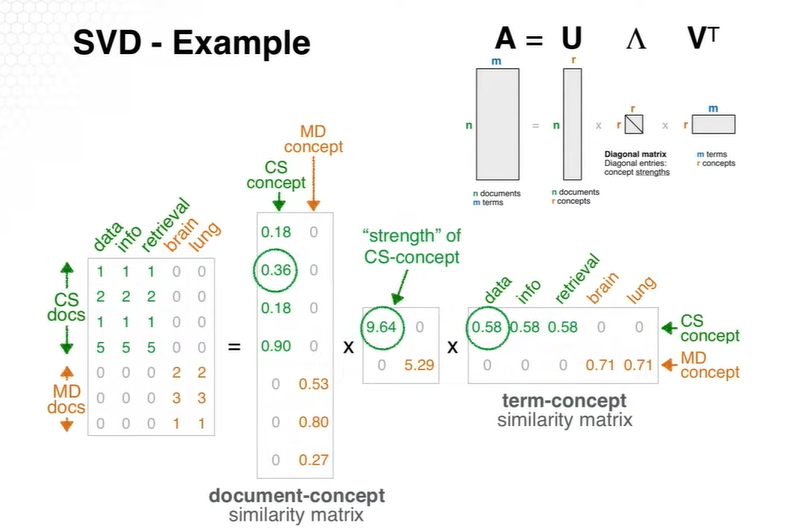

In [24]:
from IPython.display import Image

Image(filename='Annotation 2023-11-19 204154.png')

In [25]:
hdp_model = HdpModel(corpus=corpus, id2word=dictionary)
hdp_model.show_topics()


[(0,
  '0.005*35C. + 0.004*need + 0.004*treatment + 0.004*office + 0.004*Moscow + 0.004*mystery + 0.004*faithful + 0.004*expect + 0.004*comb + 0.003*cm + 0.003*Services + 0.003*Malawi + 0.003*husband + 0.003*thunderstorm + 0.003*interest + 0.003*stage + 0.003*U.N. + 0.003*fall + 0.003*temperature + 0.003*Batasuna'),
 (1,
  '0.005*brave + 0.005*Ridgeway + 0.005*discipline + 0.005*urge + 0.004*news + 0.004*believe + 0.004*Israel + 0.004*cabinet + 0.004*technology + 0.004*Harry + 0.004*conduct + 0.004*hunter + 0.004*american + 0.004*close + 0.004*Arabia + 0.004*consider + 0.004*life + 0.003*sign + 0.003*eastern + 0.003*suspect'),
 (2,
  '0.006*shark + 0.005*channel + 0.005*effort + 0.005*access + 0.005*infection + 0.005*II + 0.005*throng + 0.004*education + 0.004*large + 0.004*grow + 0.004*wealth + 0.004*woman + 0.004*state + 0.003*downtown + 0.003*Friday + 0.003*clutch + 0.003*fraud + 0.003*pick + 0.003*Blackshirts + 0.003*Police'),
 (3,
  '0.006*u.s.-british + 0.005*Saudi + 0.005*key + 

In [26]:
lda_model = LdaModel( num_topics=10, id2word=dictionary)
lda_model.show_topics()

[(0,
  '0.001*"August" + 0.001*"business" + 0.001*"court" + 0.001*"hand" + 0.001*"Russia" + 0.001*"anchor" + 0.001*"distance" + 0.001*"Island" + 0.001*"Hudak" + 0.001*"township"'),
 (1,
  '0.001*"go" + 0.001*"message" + 0.001*"phone" + 0.001*"dollar" + 0.001*"investor" + 0.001*"identity" + 0.001*"shelve" + 0.001*"rescuer" + 0.001*"Saturday" + 0.001*"vanguard"'),
 (2,
  '0.001*"wedlock" + 0.001*"exclusive" + 0.001*"sun" + 0.001*"Parliament" + 0.001*"God" + 0.001*"overshadow" + 0.001*"Malakhov" + 0.001*"rich" + 0.001*"holy" + 0.001*"East"'),
 (3,
  '0.001*"remarkable" + 0.001*"disease" + 0.001*"skirt" + 0.001*"grim" + 0.001*"prostitution" + 0.001*"Tim" + 0.001*"Khalaf" + 0.001*"Tony" + 0.001*"ombudsman" + 0.001*"productive"'),
 (4,
  '0.001*"massive" + 0.001*"mark" + 0.001*"equal" + 0.001*"swollen" + 0.001*"describe" + 0.001*"suburb" + 0.001*"help" + 0.001*"stricken" + 0.001*"infect" + 0.001*"loss"'),
 (5,
  '0.001*"sunglass" + 0.001*"low" + 0.001*"city" + 0.001*"result" + 0.001*"reporte

In [27]:
import pyLDAvis.gensim


pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.000500 -0.001155       1        1  17.898548
2      0.001111 -0.000289       2        1  12.510351
9     -0.000232  0.000415       3        1  11.471462
7      0.000722  0.000113       4        1  10.366745
0      0.000100  0.000434       5        1   9.605168
1     -0.000546  0.000472       6        1   8.890943
4     -0.000619 -0.000162       7        1   8.154584
3      0.000012 -0.000256       8        1   7.633084
8     -0.000164  0.000617       9        1   7.194789
5      0.000115 -0.000192      10        1   6.274325, topic_info=             Term      Freq     Total Category  logprob  loglift
1199          Ove  1.000000  1.000000  Default  30.0000  30.0000
1201       Rinnan  1.000000  1.000000  Default  29.0000  29.0000
1113   remarkable  1.000000  1.000000  Default  28.0000  28.0000
6        Ridgeway  1.000000  1.000000  Default  27.0000  27.0000
955   progressive  1.000000  1.000000  Default  26.0000  26.0000
...           ...       ...       ...      ...      ...      ...
286       include  0.128417  1.742539  Topic10  -6.9584   0.1609
318          hire  0.130099  1.802061  Topic10  -6.9454   0.1403
605    propaganda  0.127140  1.713006  Topic10  -6.9684   0.1680
847       Rasheed  0.127057  1.713990  Topic10  -6.9690   0.1668
917      downtown  0.126785  1.738512  Topic10  -6.9712   0.1504

[445 rows x 6 columns], token_table=Empty DataFrame
Columns: [Topic, Freq, Term]
Index: [], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 3, 10, 8, 1, 2, 5, 4, 9, 6])